## Classification model
1. How to explore the data
2. How to build a classification model
3. How to assess a classification model
4. How to compare classification models

In [224]:
# Initialization
library("caret")
library("e1071")
library("ROCR")
library("Biostrings")
library("DNAshapeR")

set.seed(168)

## 1. How to explore the data

#### Breast Cancer Wisconsin (Diagnostic) Data Set

In [302]:
## read data
df <- read.csv("breast_cancer_data.csv")
head(df)
summary(df)

## count positive and negative samples
nrow(subset(df, diagnosis=='M'))
nrow(subset(df, diagnosis=='B'))

## mean data
df_mean <- df[,2:12]
head(df_mean)

## worst data
df_worst <- cbind(df[,1:2], df[,23:32])
df_worst <- df_worst[,2:12]
head(df_worst)

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


       id            diagnosis  radius_mean      texture_mean  
 Min.   :     8670   B:357     Min.   : 6.981   Min.   : 9.71  
 1st Qu.:   869218   M:212     1st Qu.:11.700   1st Qu.:16.17  
 Median :   906024             Median :13.370   Median :18.84  
 Mean   : 30371831             Mean   :14.127   Mean   :19.29  
 3rd Qu.:  8813129             3rd Qu.:15.780   3rd Qu.:21.80  
 Max.   :911320502             Max.   :28.110   Max.   :39.28  
 perimeter_mean     area_mean      smoothness_mean   compactness_mean 
 Min.   : 43.79   Min.   : 143.5   Min.   :0.05263   Min.   :0.01938  
 1st Qu.: 75.17   1st Qu.: 420.3   1st Qu.:0.08637   1st Qu.:0.06492  
 Median : 86.24   Median : 551.1   Median :0.09587   Median :0.09263  
 Mean   : 91.97   Mean   : 654.9   Mean   :0.09636   Mean   :0.10434  
 3rd Qu.:104.10   3rd Qu.: 782.7   3rd Qu.:0.10530   3rd Qu.:0.13040  
 Max.   :188.50   Max.   :2501.0   Max.   :0.16340   Max.   :0.34540  
 concavity_mean    concave_points_mean symmetry_mean   

[1] 212

[1] 357

diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883
M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613


diagnosis,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
M,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
M,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
M,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
M,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
M,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
M,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.0000000,0.32378189,0.9978553,0.9873572,0.17058119,0.5061236,0.6767636,0.8225285,0.14774124,-0.31163083
texture_mean,0.3237819,1.00000000,0.3295331,0.3210857,-0.02338852,0.2367022,0.3024178,0.2934641,0.07140098,-0.07643718
perimeter_mean,0.9978553,0.32953306,1.0000000,0.9865068,0.20727816,0.5569362,0.7161357,0.8509770,0.18302721,-0.26147691
area_mean,0.9873572,0.32108570,0.9865068,1.0000000,0.17702838,0.4985017,0.6859828,0.8232689,0.15129308,-0.28310981
smoothness_mean,0.1705812,-0.02338852,0.2072782,0.1770284,1.00000000,0.6591232,0.5219838,0.5536952,0.55777479,0.58479200
compactness_mean,0.5061236,0.23670222,0.5569362,0.4985017,0.65912322,1.0000000,0.8831207,0.8311350,0.60264105,0.56536866
concavity_mean,0.6767636,0.30241783,0.7161357,0.6859828,0.52198377,0.8831207,1.0000000,0.9213910,0.50066662,0.33678336
concave_points_mean,0.8225285,0.29346405,0.8509770,0.8232689,0.55369517,0.8311350,0.9213910,1.0000000,0.46249739,0.16691738
symmetry_mean,0.1477412,0.07140098,0.1830272,0.1512931,0.55777479,0.6026410,0.5006666,0.4624974,1.00000000,0.47992133
fractal_dimension_mean,-0.3116308,-0.07643718,-0.2614769,-0.2831098,0.58479200,0.5653687,0.3367834,0.1669174,0.47992133,1.00000000


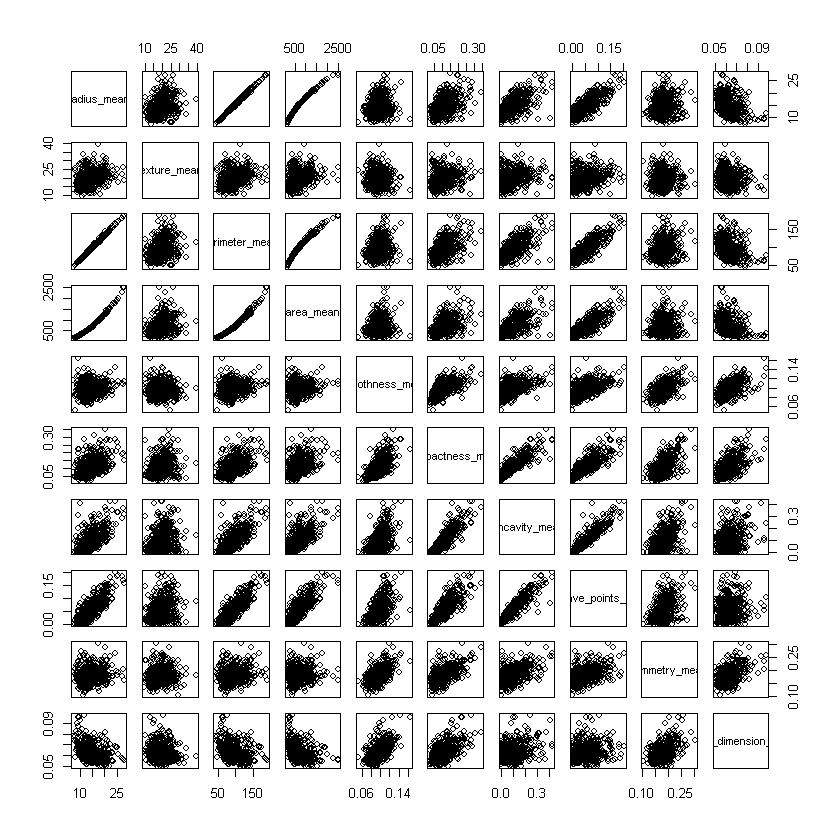

In [303]:
## calculate correlations between features
plot(df_mean[,2:11])
cor(df_mean[,2:11], df_mean[,2:11])

In [304]:
## check is there is missing data
df[is.na(df)]

character(0)

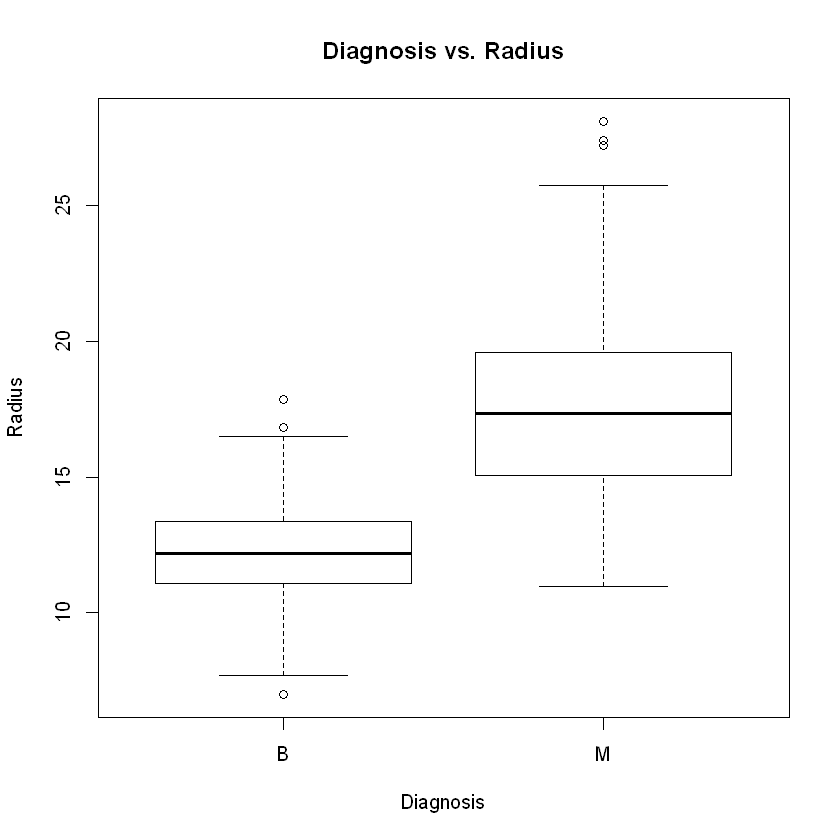

In [305]:
plot(df$diagnosis, df$radius_mean, main="Diagnosis vs. Radius", xlab="Diagnosis", ylab="Radius")

## 2. How to build a classification model

In [306]:
## Scaling
## for "mean" data
df_mean <- df[,2:12]
head(df_mean)
preproc1 <- preProcess(df_mean[,2:11], method=c("range")) 
norm1 <- predict(preproc1, df_mean[,2:11]) 
summary(norm1)
df_mean[2:11] <- norm1
head(df_mean)

## for "worst" data
df_worst <- cbind(df[,1:2], df[,23:32])
df_worst <- df_worst[,2:12]
head(df_worst)
preproc1 <- preProcess(df_worst[,2:11], method=c("range")) 
norm1 <- predict(preproc1, df_worst[,2:11]) 
summary(norm1)
df_worst[2:11] <- norm1
head(df_worst)

## Standardization
## for "mean" data
df_mean <- df[,2:12]
head(df_mean)
preproc2 <- preProcess(df_mean[,2:11], method=c("center", "scale"))
norm2 <- predict(preproc2, df_mean[,2:11])
df_mean[2:11] <- norm2
summary(df_mean)
head(df_mean)

## for "worst" data
df_worst <- cbind(df[,1:2], df[,23:32])
df_worst <- df_worst[,2:12]
head(df_worst)
preproc2 <- preProcess(df_worst[,2:11], method=c("center", "scale"))
norm2 <- predict(preproc2, df_worst[,2:11])
df_worst[2:11] <- norm2
head(df_worst)

diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883
M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613


  radius_mean      texture_mean    perimeter_mean     area_mean     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.2233   1st Qu.:0.2185   1st Qu.:0.2168   1st Qu.:0.1174  
 Median :0.3024   Median :0.3088   Median :0.2933   Median :0.1729  
 Mean   :0.3382   Mean   :0.3240   Mean   :0.3329   Mean   :0.2169  
 3rd Qu.:0.4164   3rd Qu.:0.4089   3rd Qu.:0.4168   3rd Qu.:0.2711  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
 smoothness_mean  compactness_mean concavity_mean    concave_points_mean
 Min.   :0.0000   Min.   :0.0000   Min.   :0.00000   Min.   :0.0000     
 1st Qu.:0.3046   1st Qu.:0.1397   1st Qu.:0.06926   1st Qu.:0.1009     
 Median :0.3904   Median :0.2247   Median :0.14419   Median :0.1665     
 Mean   :0.3948   Mean   :0.2606   Mean   :0.20806   Mean   :0.2431     
 3rd Qu.:0.4755   3rd Qu.:0.3405   3rd Qu.:0.30623   3rd Qu.:0.3678     
 Max.   :1.0000   Max.   :1.0000   Max.   :1.00000   Max.   :1.0000     
 symme

diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
M,0.5210374,0.0226581,0.5459885,0.3637328,0.5937528,0.7920373,0.7031396,0.7311133,0.6863636,0.6055181
M,0.6431445,0.2725736,0.6157833,0.5015907,0.2898799,0.1817680,0.2036082,0.3487575,0.3797980,0.1413227
M,0.6014956,0.3902604,0.5957432,0.4494168,0.5143089,0.4310165,0.4625117,0.6356859,0.5095960,0.2112468
M,0.2100904,0.3608387,0.2335015,0.1029056,0.8113208,0.8113613,0.5656045,0.5228628,0.7762626,1.0000000
M,0.6298926,0.1565776,0.6309861,0.4892895,0.4303512,0.3478928,0.4639175,0.5183897,0.3782828,0.1868155
M,0.2588386,0.2025702,0.2679842,0.1415058,0.6786133,0.4619962,0.3697282,0.4020378,0.5186869,0.5511794


diagnosis,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
M,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
M,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
M,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
M,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
M,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
M,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


  radius_worst    texture_worst    perimeter_worst    area_worst     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.1807   1st Qu.:0.2415   1st Qu.:0.1678   1st Qu.:0.08113  
 Median :0.2504   Median :0.3569   Median :0.2353   Median :0.12321  
 Mean   :0.2967   Mean   :0.3640   Mean   :0.2831   Mean   :0.17091  
 3rd Qu.:0.3863   3rd Qu.:0.4717   3rd Qu.:0.3735   3rd Qu.:0.22090  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.00000  
 smoothness_worst compactness_worst concavity_worst   concave_points_worst
 Min.   :0.0000   Min.   :0.0000    Min.   :0.00000   Min.   :0.0000      
 1st Qu.:0.3000   1st Qu.:0.1163    1st Qu.:0.09145   1st Qu.:0.2231      
 Median :0.3971   Median :0.1791    Median :0.18107   Median :0.3434      
 Mean   :0.4041   Mean   :0.2202    Mean   :0.21740   Mean   :0.3938      
 3rd Qu.:0.4942   3rd Qu.:0.3025    3rd Qu.:0.30583   3rd Qu.:0.5546      
 Max.   :1.0000   Max.   :1.0000    Max.   :1.00000   Max.  

diagnosis,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
M,0.6207755,0.1415245,0.6683102,0.45069799,0.6011358,0.6192916,0.5686102,0.9120275,0.5984624,0.4188640
M,0.6069015,0.3035714,0.5398177,0.43521431,0.3475533,0.1545634,0.1929712,0.6391753,0.2335896,0.2228781
M,0.5563856,0.3600746,0.5084417,0.37450845,0.4835898,0.3853751,0.3597444,0.8350515,0.4037059,0.2134330
M,0.2483102,0.3859275,0.2413467,0.09400806,0.9154725,0.8140117,0.5486422,0.8848797,1.0000000,0.7737111
M,0.5197439,0.1239339,0.5069476,0.34157491,0.4373638,0.1724151,0.3194888,0.5584192,0.1575005,0.1425948
M,0.2682319,0.3126333,0.2639076,0.13674794,0.7127386,0.4827837,0.4277157,0.5982818,0.4770353,0.4549390


diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883
M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613


 diagnosis  radius_mean       texture_mean     perimeter_mean   
 B:357     Min.   :-2.0279   Min.   :-2.2273   Min.   :-1.9828  
 M:212     1st Qu.:-0.6888   1st Qu.:-0.7253   1st Qu.:-0.6913  
           Median :-0.2149   Median :-0.1045   Median :-0.2358  
           Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
           3rd Qu.: 0.4690   3rd Qu.: 0.5837   3rd Qu.: 0.4992  
           Max.   : 3.9678   Max.   : 4.6478   Max.   : 3.9726  
   area_mean       smoothness_mean    compactness_mean  concavity_mean   
 Min.   :-1.4532   Min.   :-3.10935   Min.   :-1.6087   Min.   :-1.1139  
 1st Qu.:-0.6666   1st Qu.:-0.71034   1st Qu.:-0.7464   1st Qu.:-0.7431  
 Median :-0.2949   Median :-0.03486   Median :-0.2217   Median :-0.3419  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.3632   3rd Qu.: 0.63564   3rd Qu.: 0.4934   3rd Qu.: 0.5256  
 Max.   : 5.2459   Max.   : 4.76672   Max.   : 4.5644   Max.   : 4.2399  
 concave_points_mean symmet

diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
M,1.0960995,-2.0715123,1.2688173,0.9835095,1.5670875,3.2806281,2.65054179,2.5302489,2.215565542,2.2537638
M,1.8282120,-0.3533215,1.6844726,1.9070303,-0.8262354,-0.4866435,-0.02382489,0.5476623,0.001391139,-0.8678888
M,1.5784992,0.4557859,1.5651260,1.5575132,0.9413821,1.0519999,1.36227979,2.0354398,0.938858720,-0.3976580
M,-0.7682333,0.2535091,-0.5921661,-0.7637917,3.2806668,3.3999174,1.91421287,1.4504311,2.864862154,4.9066020
M,1.7487579,-1.1508038,1.7750113,1.8246238,0.2801253,0.5388663,1.36980615,1.4272370,-0.009552062,-0.5619555
M,-0.4759559,-0.8346009,-0.3868077,-0.5052059,2.2354545,1.2432416,0.86554001,0.8239307,1.004517928,1.8883435


diagnosis,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
M,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
M,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
M,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
M,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
M,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
M,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


diagnosis,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
M,1.8850310,-1.35809849,2.3015755,1.9994782,1.3065367,2.6143647,2.1076718,2.2940576,2.7482041,1.9353117
M,1.8043398,-0.36887865,1.5337764,1.8888270,-0.3752817,-0.4300658,-0.1466200,1.0861286,-0.2436753,0.2809428
M,1.5105411,-0.02395331,1.3462906,1.4550043,0.5269438,1.0819801,0.8542223,1.9532817,1.1512420,0.2012142
M,-0.2812170,0.13386631,-0.2497196,-0.5495377,3.3912907,3.8899747,1.9878392,2.1738732,6.0407261,4.9306719
M,1.2974336,-1.46548091,1.3373627,1.2196511,0.2203623,-0.3131190,0.6126397,0.7286181,-0.8675896,-0.3967505
M,-0.1653528,-0.31356043,-0.1149083,-0.2441054,2.0467119,1.7201029,1.2621327,0.9050914,1.7525273,2.2398308


In [323]:
## Create training and test data
train_index <- createDataPartition(df_mean$diagnosis, p=0.7, list=FALSE, times=1)
df_mean_train <- df_mean[train_index,]
df_mean_test <- df_mean[-train_index,]
nrow(df_mean_train)
nrow(df_mean_test)
head(df_mean_train)
head(df_mean_test)

## for "worst"
df_worst_train <- df_worst[train_index,]
df_worst_test <- df_worst[-train_index,]
head(df_worst_train)
head(df_worst_test)

[1] 399

[1] 170

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
3,M,1.5784992,0.4557859,1.5651260,1.5575132,0.9413821,1.05199990,1.3622798,2.0354398,0.938858720,-0.3976580
4,M,-0.7682333,0.2535091,-0.5921661,-0.7637917,3.2806668,3.39991742,1.9142129,1.4504311,2.864862154,4.9066020
5,M,1.7487579,-1.1508038,1.7750113,1.8246238,0.2801253,0.53886631,1.3698061,1.4272370,-0.009552062,-0.5619555
7,M,1.1698783,0.1605082,1.1371245,1.0943320,-0.1230280,0.08821762,0.2998086,0.6463664,-0.064268069,-0.7616620
9,M,-0.3198854,0.5883121,-0.1839186,-0.3838695,2.1999031,1.68252936,1.2180246,1.1496800,1.963871911,1.5710793
10,M,-0.4731182,1.1044669,-0.3291921,-0.5086158,1.5813080,2.56110495,1.7373434,0.9409324,0.796597103,2.7806489


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
1,M,1.0960995,-2.0715123,1.26881726,0.98350952,1.5670875,3.28062806,2.65054179,2.5302489,2.215565542,2.2537638
2,M,1.8282120,-0.3533215,1.68447255,1.90703027,-0.8262354,-0.48664348,-0.02382489,0.5476623,0.001391139,-0.8678888
6,M,-0.4759559,-0.8346009,-0.38680772,-0.50520593,2.2354545,1.24324156,0.86554001,0.8239307,1.004517928,1.8883435
8,M,-0.1184126,0.3581350,-0.07280278,-0.21877241,1.6026389,1.13910006,0.06097210,0.2817024,1.402120910,1.6588935
14,M,0.4888435,1.0835417,0.48277607,0.36318774,-0.8781405,-0.07840879,0.13272340,0.1216626,0.129061821,-1.3338705
16,M,0.1171120,1.9182243,0.19593277,0.01111321,1.2471245,1.04442597,0.94205801,0.6370887,1.792428424,1.1291757


,diagnosis,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
3,M,1.5105411,-0.02395331,1.34629062,1.4550043,0.5269438,1.08198014,0.8542223,1.9532817,1.1512420,0.20121416
4,M,-0.2812170,0.13386631,-0.24971958,-0.5495377,3.3912907,3.88997467,1.9878392,2.1738732,6.0407261,4.93067187
5,M,1.2974336,-1.46548091,1.33736272,1.2196511,0.2203623,-0.31311900,0.6126397,0.7286181,-0.8675896,-0.39675052
7,M,1.3677798,0.32259904,1.36712237,1.2740985,0.5181843,0.02119633,0.5091043,1.1956637,0.2622449,-0.01471753
9,M,-0.1612147,0.82208998,-0.03158132,-0.2481451,1.6612952,1.81671116,1.2789092,1.3903928,2.3877562,1.28751667
10,M,-0.2439749,2.44096127,-0.28602635,-0.2971477,2.3182555,5.10838243,3.9919204,1.6185910,2.3683599,6.84083682


,diagnosis,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
1,M,1.8850310,-1.3580985,2.30157548,1.999478159,1.3065367,2.6143647,2.10767182,2.29405760,2.7482041,1.9353117
2,M,1.8043398,-0.3688786,1.53377643,1.888827020,-0.3752817,-0.4300658,-0.14661996,1.08612862,-0.2436753,0.2809428
6,M,-0.1653528,-0.3135604,-0.11490835,-0.244105421,2.0467119,1.7201029,1.26213265,0.90509140,1.7525273,2.2398308
8,M,0.1636190,0.4006953,0.09936115,0.028834057,1.4466882,0.7241483,-0.02103534,0.62364699,0.4772206,1.7249168
14,M,0.1181009,0.3225990,0.14102467,-0.007171473,-0.8439134,-0.3932021,-0.19167703,-0.04117035,-0.1483101,-1.1669069
16,M,0.2463792,1.8633740,0.50111647,0.109978225,1.5518018,2.5641538,2.06309407,0.86097309,2.1291389,2.7768917


Warning message in train.default(x, y, weights = w, ...):
"The metric "ROC" was not in the result set. Accuracy will be used instead."Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Generalized Linear Model 

399 samples
 10 predictor
  2 classes: 'B', 'M' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 359, 360, 359, 359, 359, 359, ... 
Resampling results:

  Accuracy   Kappa    
  0.9246795  0.8393566



Call:
NULL

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.73416  -0.15087  -0.03894   0.00207   2.57066  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)              0.4951     0.6913   0.716   0.4739    
radius_mean            -13.4618    15.3081  -0.879   0.3792    
texture_mean             1.5658     0.3253   4.814 1.48e-06 ***
perimeter_mean           6.0179    14.6723   0.410   0.6817    
area_mean               13.5404     7.3893   1.832   0.0669 .  
smoothness_mean          0.9987     0.6007   1.663   0.0964 .  
compactness_mean        -0.7065     1.3801  -0.512   0.6087    
concavity_mean           0.5739     0.8216   0.698   0.4849    
concave_points_mean      2.0024     1.4135   1.417   0.1566    
symmetry_mean            0.9014     0.3938   2.289   0.0221 *  
fractal_dimension_mean  -0.3596     0.7968  -0.451   0.6518    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion p

glm variable importance

                       Overall
texture_mean           100.000
symmetry_mean           42.670
area_mean               32.299
smoothness_mean         28.443
concave_points_mean     22.856
radius_mean             10.656
concavity_mean           6.547
compactness_mean         2.311
fractal_dimension_mean   0.934
perimeter_mean           0.000

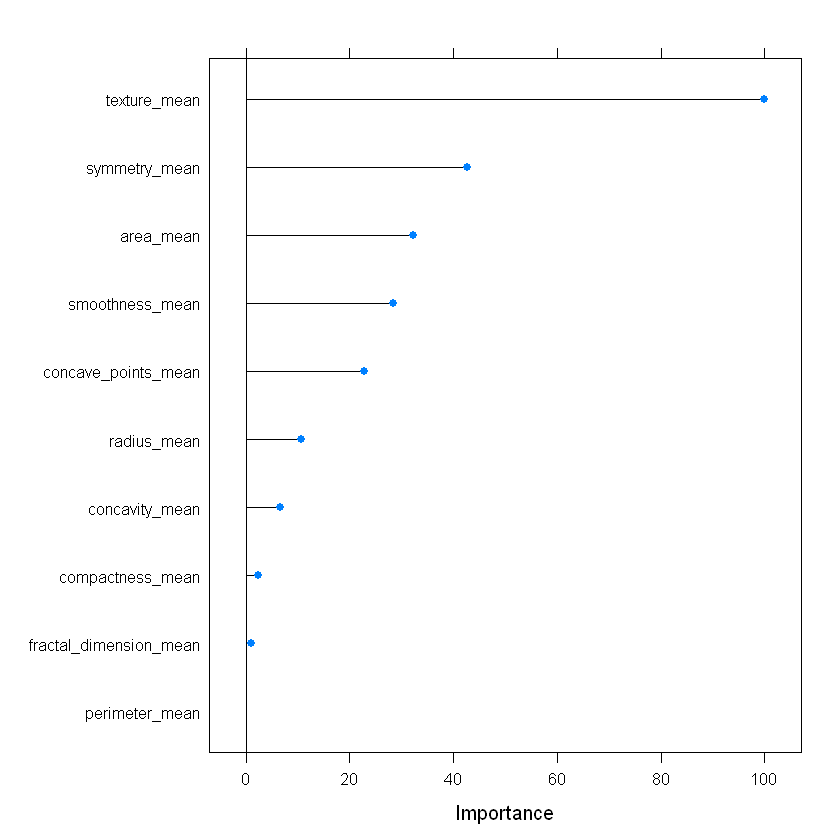

In [324]:
## Logistic regression
## Set parameters for caret
trainControl <- trainControl(method = "cv", number = 10, 
                              savePredictions = TRUE, classProbs = TRUE)

# Perform prediction for "mean" data
model_mean <- train(diagnosis~., data = df_mean_train, trControl = trainControl,
                 method = "glm", family = binomial, metric ="ROC")
model_mean
summary(model_mean)
varImp(model_mean)
plot(varImp(model_mean), top=10)

Warning message in train.default(x, y, weights = w, ...):
"The metric "ROC" was not in the result set. Accuracy will be used instead."Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities nume

Generalized Linear Model 

399 samples
 10 predictor
  2 classes: 'B', 'M' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 359, 359, 359, 359, 359, 359, ... 
Resampling results:

  Accuracy   Kappa    
  0.9673718  0.9290775



Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4465  -0.0431  -0.0055   0.0004   4.2970  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -0.04034    1.08325  -0.037 0.970293    
radius_worst            -1.77240    8.08404  -0.219 0.826458    
texture_worst            1.63271    0.45820   3.563 0.000366 ***
perimeter_worst          0.22823    5.33578   0.043 0.965882    
area_worst              10.25855    9.53792   1.076 0.282127    
smoothness_worst         0.92750    0.56794   1.633 0.102447    
compactness_worst       -1.26908    1.69979  -0.747 0.455298    
concavity_worst          0.80674    0.92526   0.872 0.383260    
concave_points_worst     3.24075    1.54680   2.095 0.036159 *  
symmetry_worst           0.56302    0.40554   1.388 0.165042    
fractal_dimension_worst -0.09007    1.13212  -0.080 0.936591    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion

glm variable importance

                        Overall
texture_worst           100.000
concave_points_worst     58.297
smoothness_worst         45.173
symmetry_worst           38.220
area_worst               29.336
concavity_worst          23.551
compactness_worst        19.992
radius_worst              5.013
fractal_dimension_worst   1.045
perimeter_worst           0.000

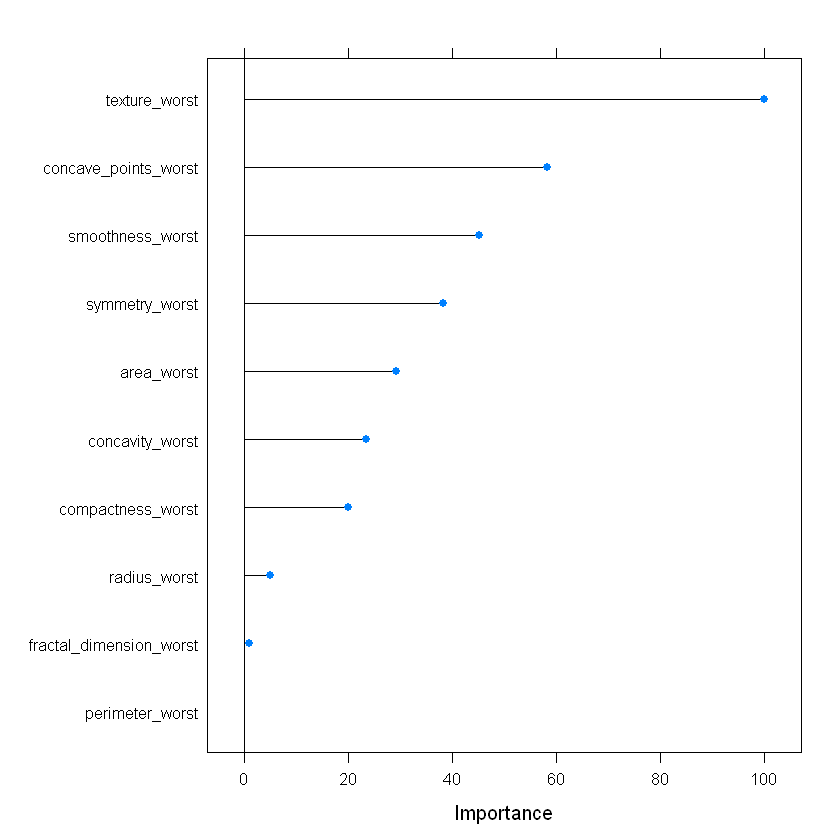

In [325]:
## Perform prediction for "worst" data
model_worst <- train(diagnosis~., data = df_worst_train, trControl = trainControl,
                method = "glm", family = binomial, metric ="ROC")
model_worst
summary(model_worst)
varImp(model_worst)
plot(varImp(model_worst),top=10)

## 3. How to assess a classification model

### 3.1 Confusion matrix

In [327]:
pred_mean <- predict(model_mean,df_mean_test)
confusionMatrix(pred_mean,df_mean_test$diagnosis)

Confusion Matrix and Statistics

          Reference
Prediction   B   M
         B 104   7
         M   3  56
                                          
               Accuracy : 0.9412          
                 95% CI : (0.8945, 0.9714)
    No Information Rate : 0.6294          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8722          
                                          
 Mcnemar's Test P-Value : 0.3428          
                                          
            Sensitivity : 0.9720          
            Specificity : 0.8889          
         Pos Pred Value : 0.9369          
         Neg Pred Value : 0.9492          
             Prevalence : 0.6294          
         Detection Rate : 0.6118          
   Detection Prevalence : 0.6529          
      Balanced Accuracy : 0.9304          
                                          
       'Positive' Class : B               
                              

In [328]:
pred_worst <- predict(model_worst,df_worst_test)
confusionMatrix(pred_worst,df_worst_test$diagnosis)

Confusion Matrix and Statistics

          Reference
Prediction   B   M
         B 107   4
         M   0  59
                                          
               Accuracy : 0.9765          
                 95% CI : (0.9409, 0.9936)
    No Information Rate : 0.6294          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9489          
                                          
 Mcnemar's Test P-Value : 0.1336          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9365          
         Pos Pred Value : 0.9640          
         Neg Pred Value : 1.0000          
             Prevalence : 0.6294          
         Detection Rate : 0.6294          
   Detection Prevalence : 0.6529          
      Balanced Accuracy : 0.9683          
                                          
       'Positive' Class : B               
                              

### 3.2 AUROC
Calculate the area under the ROC (Receiver operating characteristic) curve.

In [331]:
## Calculate AUROC for "mean" data
## Training performance
head(model_mean$pred)
prediction_mean <- prediction(model_mean$pred$M, model_mean$pred$obs)
performance_mean <- performance(prediction_mean, "tpr", "fpr")
auc_mean <- performance(prediction_mean, "auc")
auc_mean <- unlist(slot(auc_mean, "y.values"))
auc_mean

## Test performance
pred_mean_test <- predict(model_mean, df_mean_test, type="prob")
head(pred_mean_test)
prediction_mean_test <- prediction(pred_mean_test$M, df_mean_test$diagnosis)
performance_mean_test <- performance(prediction_mean_test, "tpr", "fpr")
auc_mean_test <- performance(prediction_mean_test, "auc")
auc_mean_test <- unlist(slot(auc_mean_test, "y.values"))
auc_mean_test

pred,obs,B,M,rowIndex,parameter,Resample
M,M,1.160818e-01,0.883918179,6,none,Fold01
M,M,7.377182e-05,0.999926228,16,none,Fold01
M,M,2.639492e-02,0.973605079,17,none,Fold01
M,M,3.569738e-06,0.999996430,21,none,Fold01
B,B,9.875811e-01,0.012418943,36,none,Fold01
B,B,9.982338e-01,0.001766228,41,none,Fold01


[1] 0.9846711

,B,M
1,2.836365e-05,0.9999716
2,5.007290e-06,0.9999950
6,4.614811e-01,0.5385189
8,2.121733e-01,0.7878267
14,2.852257e-02,0.9714774
16,1.128878e-03,0.9988711


[1] 0.9792316

In [333]:
## calculate for "worst" data
## Training performance
head(model_worst$pred)
prediction_worst <- prediction(model_worst$pred$M, model_worst$pred$obs)
performance_worst <- performance(prediction_worst, "tpr", "fpr")
auc_worst <- performance(prediction_worst, "auc")
auc_worst <- unlist(slot(auc_worst, "y.values"))
auc_worst

## Test performance
pred_worst_test <- predict(model_worst, df_worst_test, type="prob")
head(pred_worst_test)
prediction_worst_test <- prediction(pred_worst_test$M, df_worst_test$diagnosis)
performance_worst_test <- performance(prediction_worst_test, "tpr", "fpr")
auc_worst_test <- performance(prediction_worst_test, "auc")
auc_worst_test <- unlist(slot(auc_worst_test, "y.values"))
auc_worst_test

pred,obs,B,M,rowIndex,parameter,Resample
M,M,2.220446e-16,1.000000e+00,3,none,Fold01
M,M,2.220446e-16,1.000000e+00,4,none,Fold01
M,M,2.220446e-16,1.000000e+00,11,none,Fold01
B,M,1.000000e+00,2.220446e-16,24,none,Fold01
B,M,1.000000e+00,2.220446e-16,25,none,Fold01
B,B,1.000000e+00,2.220446e-16,38,none,Fold01


[1] 0.9695302

,B,M
1,4.429934e-11,1.0000000
2,4.056878e-09,1.0000000
6,1.594768e-01,0.8405232
8,3.982606e-02,0.9601739
14,5.779888e-01,0.4220112
16,6.131381e-04,0.9993869


[1] 0.988429

## 4. How to compare classification models

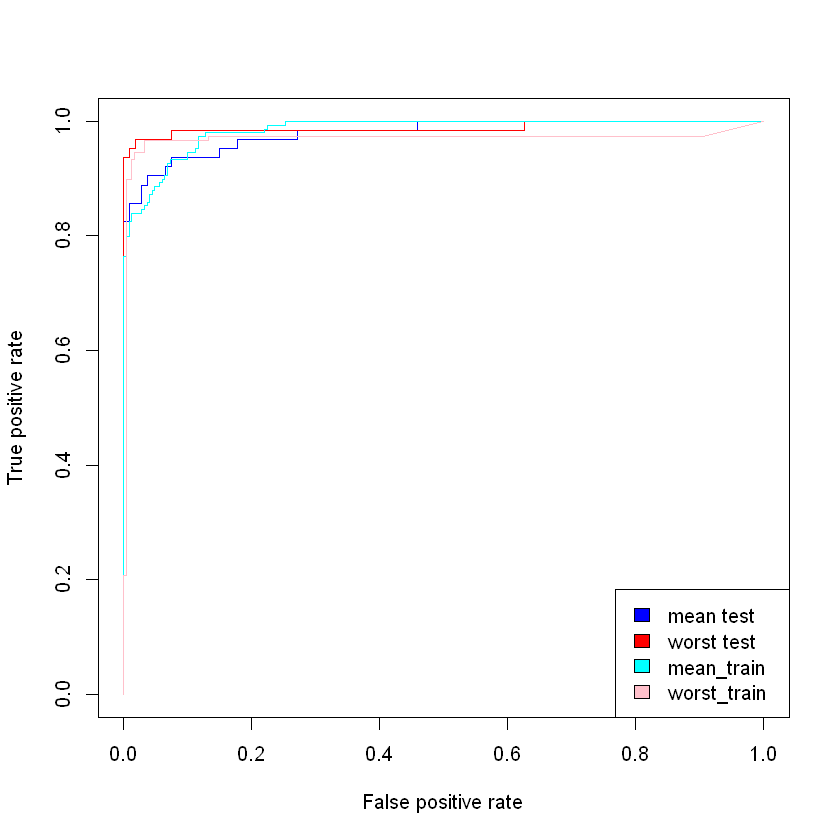

In [334]:
plot(performance_mean_test, col="blue" )
plot(performance_worst_test, col="red", add = TRUE)
plot(performance_mean, col="cyan", add = TRUE)
plot(performance_worst, col="pink", add = TRUE)

legend("bottomright", c("mean test","worst test", "mean_train", "worst_train"), fill=c("blue","red", "cyan", "pink"))

## 5. Molecular biology example - TF-DNA binding analysis on ChIP-seq data

In [335]:
## Generate data for the classifcation (assign Y to bound and N to non-bound)
# bound
fn_bound <- "bound.fa"
boundFasta <- readDNAStringSet(fn_bound)
sequences <- paste(boundFasta)
boundTxt <- data.frame(seq=sequences, isBound="Y")

# non-bound
fn_unbound <- "unbound.fa"
nonboundFasta <- readDNAStringSet(fn_unbound)
sequences <- paste(nonboundFasta)
nonboundTxt <- data.frame(seq=sequences, isBound="N")

# merge two datasets
writeXStringSet(c(boundFasta, nonboundFasta), "ctcf.fa")
exp_data <- rbind(boundTxt, nonboundTxt)
head(exp_data)

seq,isBound
GCCGGCAGGTGGCGCCCGACCTGGCGTTCT,Y
GGCCAGCCTGCAGCGGAGAAAACCACCTTT,Y
CCTGGGACCTGCAGCCTGAAAAGCTGGACT,Y
AGGTTGGTCAGTAGAGGGCGCCCTGGTCAT,Y
GGTGGACAGTGGACAATAGCGTGCCTTTCT,Y
TAGCCGAGACAGCAGAGGGCGCCCAGATTC,Y


In [336]:
## DNAshapeR prediction
pred <- getShape("ctcf.fa")

## Encode feature vectors
featureType <- c("1-mer", "1-shape")
featureVector <- encodeSeqShape("ctcf.fa", pred, featureType)
df <- data.frame(isBound = exp_data$isBound, featureVector)

Reading the input sequence......
Reading the input sequence......
Reading the input sequence......
Reading the input sequence......
Reading the input sequence......


Parsing files......
Record length: 30
Record length: 29
Record length: 30
Record length: 29
Record length: 30
Done


In [337]:
## Logistic regression
# Set parameters for Caret
trainControl <- trainControl(method = "cv", number = 10, 
                              savePredictions = TRUE, classProbs = TRUE)
# Perform prediction
model <- train(isBound~ ., data = df, trControl = trainControl,
                method = "glm", family = binomial, metric ="ROC")
model
summary(model)

Warning message in train.default(x, y, weights = w, ...):
"The metric "ROC" was not in the result set. Accuracy will be used instead."Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning 

Generalized Linear Model 

3999 samples
 226 predictor
   2 classes: 'Y', 'N' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 3599, 3599, 3599, 3599, 3599, 3599, ... 
Resampling results:

  Accuracy  Kappa    
  0.762693  0.5253817



Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9741  -0.7173  -0.0636   0.6744   3.4455  

Coefficients: (29 not defined because of singularities)
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  50.39336  309.81843   0.163 0.870790    
X1          -13.01304  309.78071  -0.042 0.966493    
X2          -13.40134  309.78069  -0.043 0.965494    
X3          -13.09565  309.78070  -0.042 0.966280    
X4          -12.92946  309.78068  -0.042 0.966708    
X5           -0.09948    0.24253  -0.410 0.681683    
X6           -0.37238    0.19749  -1.886 0.059356 .  
X7           -0.33568    0.16933  -1.982 0.047438 *  
X8                 NA         NA      NA       NA    
X9            0.14591    0.31658   0.461 0.644862    
X10           0.06940    0.31470   0.221 0.825453    
X11           0.21123    0.33399   0.632 0.527101    
X12                NA         NA      NA       NA    
X13          -0.03665    0.32616  -0.112 0.910525    
X14    

[1] 0.8388762

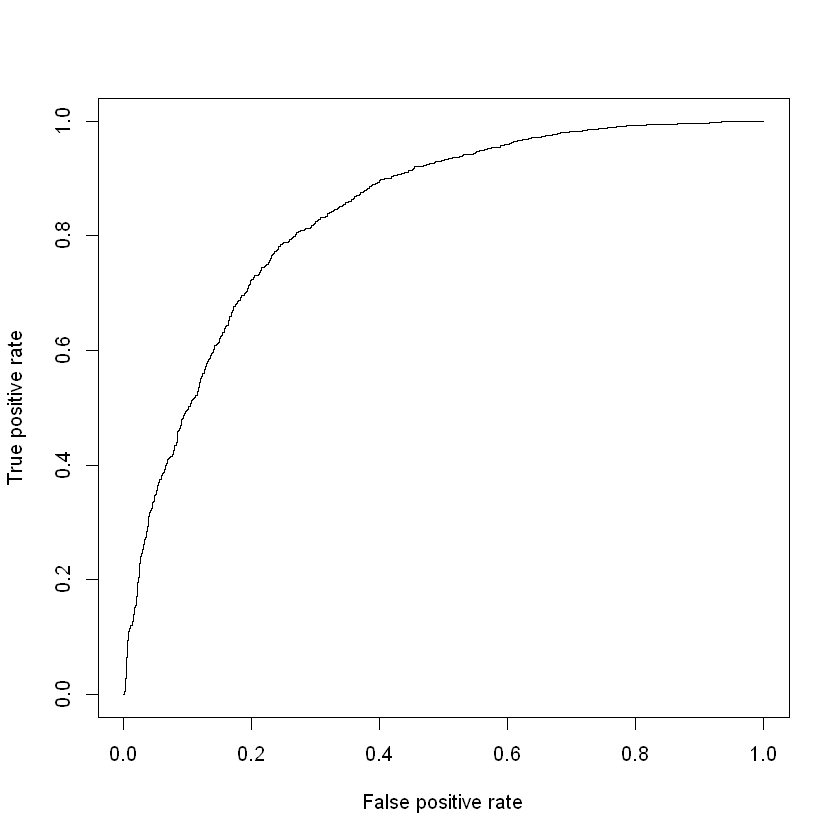

In [295]:
# ## Plot AUROC
prediction <- prediction( model$pred$Y, model$pred$obs )
performance <- performance( prediction, "tpr", "fpr" )
plot(performance)

## Caluculate AUROC
auc <- performance(prediction, "auc")
auc <- unlist(slot(auc, "y.values"))
auc